<a href="https://colab.research.google.com/github/Rayr07/ML-lab/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    accuracy_score,
    confusion_matrix,
    classification_report
)

In [3]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [5]:
X_lr = df[["sepal length (cm)", "sepal width (cm)", "petal width (cm)"]]
y_lr = df["petal length (cm)"]

In [6]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_lr, y_lr, test_size=0.2, random_state=42)

In [7]:
lr_model = LinearRegression()

In [8]:
lr_model.fit(X_train_lr, y_train_lr)

LinearRegression()

In [9]:
y_pred_lr = lr_model.predict(X_test_lr)

In [10]:
print("LINEAR REGRESSION EVALUATION")
print("Mean Squared Error:", mean_squared_error(y_test_lr, y_pred_lr))
print("Mean Absolute Error:", mean_absolute_error(y_test_lr, y_pred_lr))
print("R2 Score:", r2_score(y_test_lr, y_pred_lr))

LINEAR REGRESSION EVALUATION
Mean Squared Error: 0.13001626031382688
Mean Absolute Error: 0.2605179846252386
R2 Score: 0.9603293155857664


Q1

In [19]:
#a
df=pd.read_csv("/content/TvMarketing (1).csv")
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [20]:
#a
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


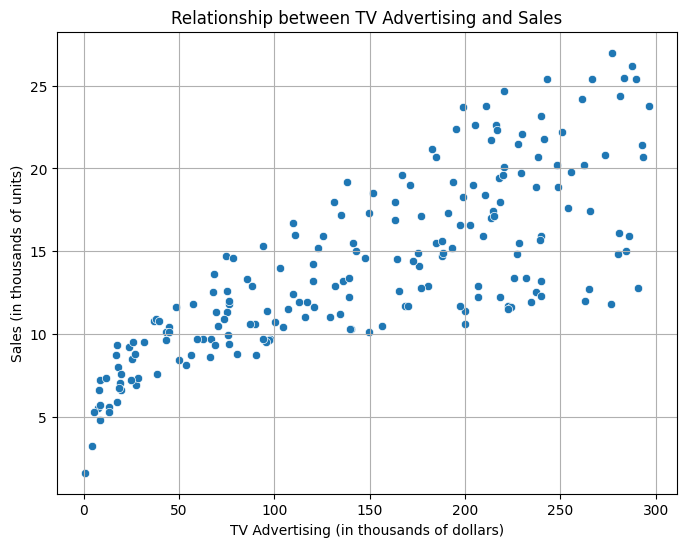

In [21]:
#b
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('Relationship between TV Advertising and Sales')
plt.xlabel('TV Advertising (in thousands of dollars)')
plt.ylabel('Sales (in thousands of units)')
plt.grid(True)
plt.show()

In [22]:
#c
X = df[['TV']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (160, 1)
Shape of X_test: (40, 1)
Shape of y_train: (160,)
Shape of y_test: (40,)


In [23]:
#d
slr_model = LinearRegression()
slr_model.fit(X_train, y_train)

print("Intercept:", slr_model.intercept_)
print("Coefficient:", slr_model.coef_[0])

Intercept: 7.119638430592953
Coefficient: 0.046529733705443346


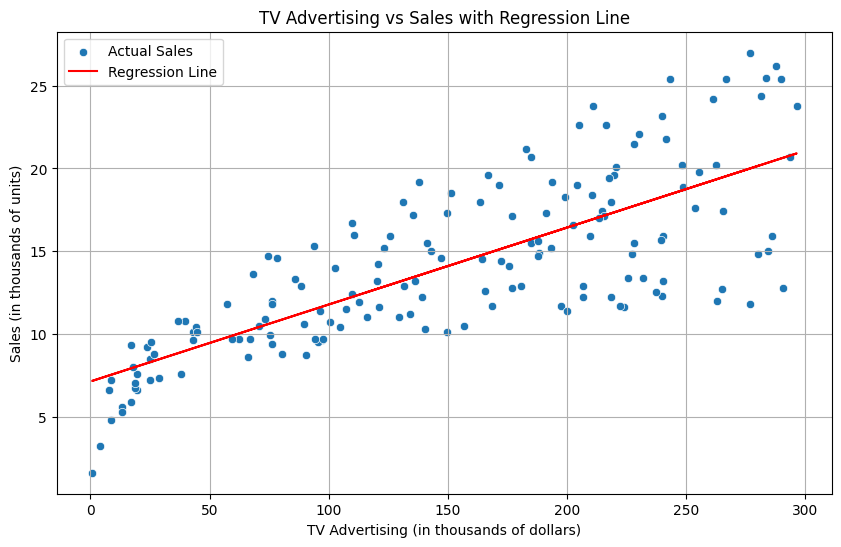

In [24]:
#d
y_train_pred = slr_model.predict(X_train)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['TV'], y=y_train, label='Actual Sales')
plt.plot(X_train['TV'], y_train_pred, color='red', label='Regression Line')
plt.xlabel('TV Advertising (in thousands of dollars)')
plt.ylabel('Sales (in thousands of units)')
plt.title('TV Advertising vs Sales with Regression Line')
plt.legend()
plt.grid(True)
plt.show()

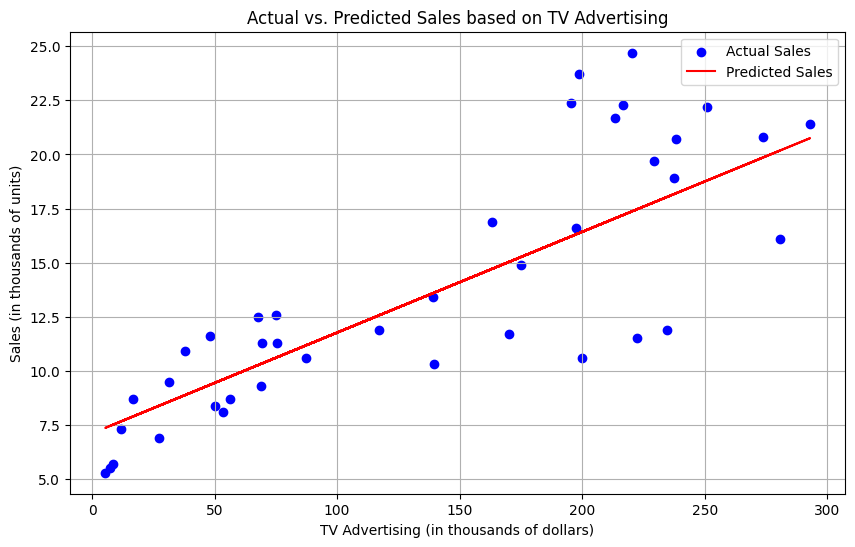

In [28]:
#e
y_pred = slr_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')
plt.plot(X_test, y_pred, color='red', label='Predicted Sales')
plt.xlabel('TV Advertising (in thousands of dollars)')
plt.ylabel('Sales (in thousands of units)')
plt.title('Actual vs. Predicted Sales based on TV Advertising')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
#f
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

Mean Squared Error (MSE): 10.2047
Root Mean Squared Error (RMSE): 3.1945
R-squared (R2) Score: 0.6767


Q2

In [41]:
## a
dfco2=pd.read_csv("/content/vehicle_co2_dataset.csv")
dfco2.head()


,vehicle_id,make,fuel_type,model_year,engine_cc,vehicle_weight,cylinders,annual_mileage_km,vehicle_age,co2_g_km,...,co2_proxy_51,co2_proxy_52,co2_proxy_53,co2_proxy_54,co2_proxy_55,co2_proxy_56,co2_proxy_57,co2_proxy_58,co2_proxy_59,co2_proxy_60
0,1,Ford,Petrol,2015,1723.557940,1584.733203,4,10529.056031,10,156.791111,...,149.661615,162.401641,153.646051,162.368301,157.700825,152.412577,162.779976,159.588916,163.360784,158.361936
1,2,Mercedes,Petrol,2010,1425.111578,1622.249986,4,15779.243800,15,143.193198,...,136.682017,148.317148,140.320897,148.286699,144.024016,139.194398,148.662671,145.748359,149.193108,144.627791
2,3,Audi,Hybrid,2011,1244.080888,1473.990569,4,14129.167461,14,123.553651,...,117.935506,127.974830,121.075298,127.948557,124.270519,120.103304,128.272963,125.758361,128.730648,124.791483
3,4,BMW,Petrol,2009,2177.834260,1831.274096,4,9290.136453,16,183.750695,...,175.395312,190.325932,180.064854,190.286860,184.816830,178.619290,190.769320,187.029570,191.449996,185.591616
4,5,Toyota,Petrol,2007,1848.899157,1732.637242,4,25519.247019,18,188.039024,...,179.488644,194.767712,184.267163,194.727728,189.130040,182.787863,195.221448,191.394420,195.918009,189.922908


In [34]:
dfco2.describe()

,vehicle_id,model_year,engine_cc,vehicle_weight,cylinders,annual_mileage_km,vehicle_age,co2_g_km,ambient_temp_avg_1,altitude_avg_1,...,co2_proxy_51,co2_proxy_52,co2_proxy_53,co2_proxy_54,co2_proxy_55,co2_proxy_56,co2_proxy_57,co2_proxy_58,co2_proxy_59,co2_proxy_60
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2014.635500,1667.830535,1570.320285,4.121000,14290.749803,10.364500,155.302338,22.057640,293.450465,...,148.240539,160.859595,152.187141,160.826571,156.203414,150.965380,161.234337,158.073577,161.809630,156.858247
std,577.494589,5.225638,663.108664,279.587219,1.682193,6076.046398,5.225638,44.433574,6.739598,195.530386,...,42.413122,46.023561,43.542284,46.014113,44.691381,43.192726,46.130779,45.226453,46.295376,44.878735
min,1.000000,2006.000000,0.000000,900.000000,0.000000,3752.210548,2.000000,50.000000,-0.398324,-397.956014,...,47.726435,51.789174,48.997054,51.778542,50.290104,48.603705,51.909823,50.892208,52.095040,50.500929
25%,500.750000,2010.000000,1356.690263,1414.958784,4.000000,9897.995496,6.000000,133.109010,17.541240,160.019226,...,127.056370,137.872113,130.438987,137.843808,133.881319,129.391821,138.193303,135.484228,138.686384,134.442574
50%,1000.500000,2015.000000,1758.384459,1590.073026,4.000000,13165.495503,10.000000,159.205305,21.968745,294.499655,...,151.966033,164.902224,156.011819,164.868370,160.129027,154.759353,165.286384,162.046189,165.876135,160.800317
75%,1500.250000,2019.000000,2096.715053,1758.441768,4.000000,17351.340037,15.000000,184.602008,26.603648,427.459971,...,176.207914,191.207709,180.899091,191.168455,185.673083,179.446830,191.653151,187.896074,192.336980,186.451458
max,2000.000000,2023.000000,3599.733390,2423.872123,8.000000,47203.114330,19.000000,292.849725,44.512141,963.537411,...,279.533467,303.328905,286.975475,303.266633,294.548861,284.671631,304.035547,298.075380,305.120363,295.783664


Selected features for correlation:
        volume       weight         CO2
0  1723.557940  1584.733203  156.791111
1  1425.111578  1622.249986  143.193198
2  1244.080888  1473.990569  123.553651
3  2177.834260  1831.274096  183.750695
4  1848.899157  1732.637242  188.039024


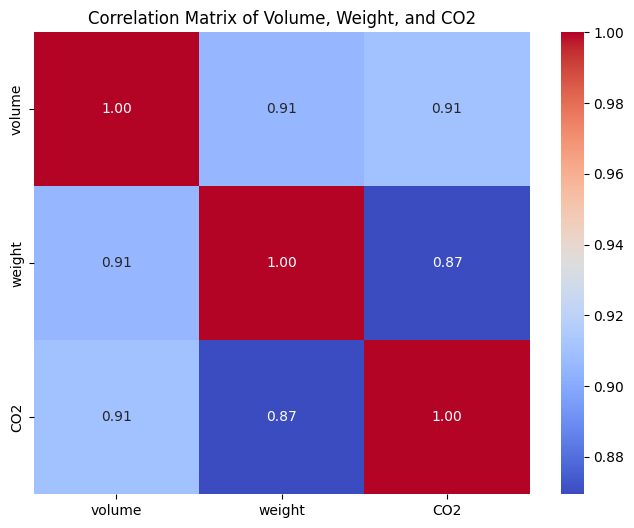

In [42]:
## b
selected_features = dfco2[["engine_cc", "vehicle_weight", "co2_g_km"]]
selected_features = selected_features.rename(columns={"engine_cc": "volume","vehicle_weight": "weight","co2_g_km": "CO2"})
print("Selected features for correlation:")
print(selected_features.head())
correlation_matrix = selected_features.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Volume, Weight, and CO2')
plt.show()

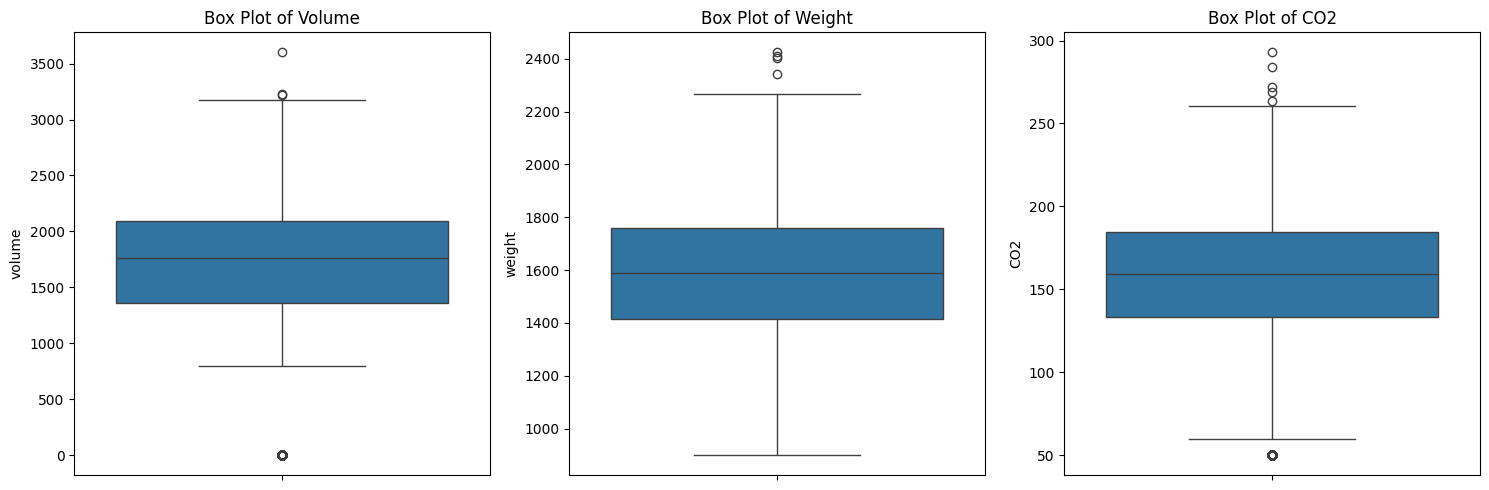

In [37]:
## c

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=selected_features["volume"])
plt.title('Box Plot of Volume')

plt.subplot(1, 3, 2)
sns.boxplot(y=selected_features["weight"])
plt.title('Box Plot of Weight')

plt.subplot(1, 3, 3)
sns.boxplot(y=selected_features["CO2"])
plt.title('Box Plot of CO2')

plt.tight_layout()
plt.show()

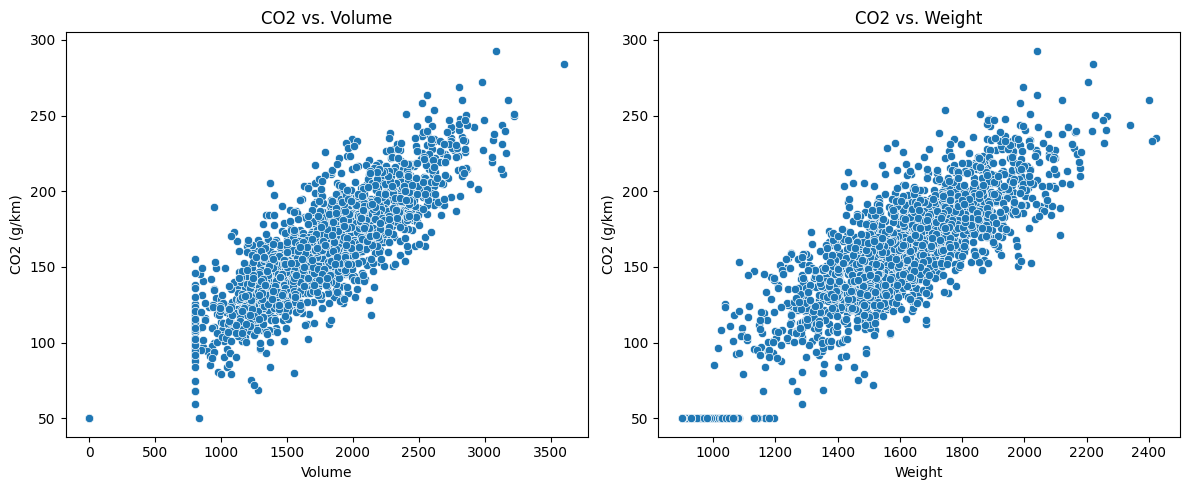

In [38]:
## d

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=selected_features["volume"], y=selected_features["CO2"])
plt.title('CO2 vs. Volume')
plt.xlabel('Volume')
plt.ylabel('CO2 (g/km)')

plt.subplot(1, 2, 2)
sns.scatterplot(x=selected_features["weight"], y=selected_features["CO2"])
plt.title('CO2 vs. Weight')
plt.xlabel('Weight')
plt.ylabel('CO2 (g/km)')

plt.tight_layout()
plt.show()

In [39]:
## e

X = selected_features[["volume", "weight"]]
y = selected_features["CO2"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model_co2 = LinearRegression()
lr_model_co2.fit(X_train, y_train)

print("Multiple Linear Regression Model trained successfully.")

Multiple Linear Regression Model trained successfully.


Intercept: 19.3961353455511
Coefficients: [0.04656695 0.0372453 ]


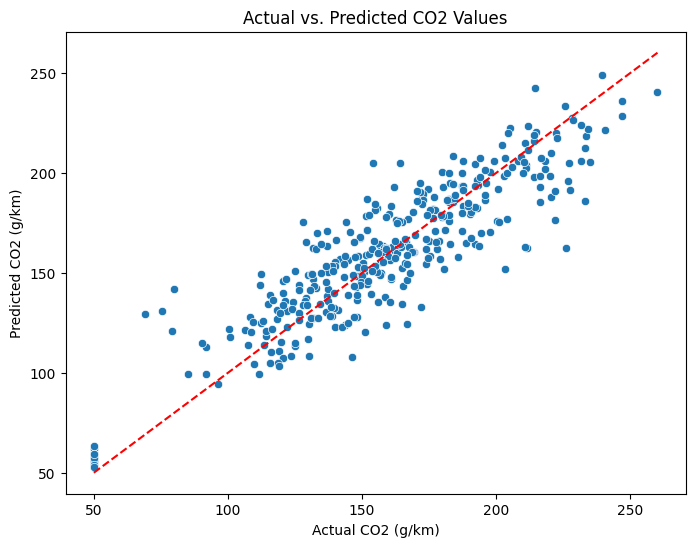

In [43]:
## f
y_pred = lr_model_co2.predict(X_test)
print("Intercept:", lr_model_co2.intercept_)
print("Coefficients:", lr_model_co2.coef_)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.xlabel('Actual CO2 (g/km)')
plt.ylabel('Predicted CO2 (g/km)')
plt.title('Actual vs. Predicted CO2 Values')
plt.show()

In [44]:
## g

mse_co2 = mean_squared_error(y_test, y_pred)
mae_co2 = mean_absolute_error(y_test, y_pred)
rmse_co2 = np.sqrt(mse_co2)

print(f"Mean Absolute Error (MAE) for CO2 prediction: {mae_co2:.4f}")
print(f"Mean Squared Error (MSE) for CO2 prediction: {mse_co2:.4f}")
print(f"Root Mean Squared Error (RMSE) for CO2 prediction: {rmse_co2:.4f}")

Mean Absolute Error (MAE) for CO2 prediction: 13.0437
Mean Squared Error (MSE) for CO2 prediction: 300.4144
Root Mean Squared Error (RMSE) for CO2 prediction: 17.3325


Q3

In [46]:
## a
dfavd=pd.read_csv("/content/advertising.csv")
dfavd.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [47]:
##a
dfavd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [48]:
##a
dfavd.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [60]:
##b
print(dfavd.isnull().sum())

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64


In [63]:
## b
numerical_features = ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']

scaler = StandardScaler()

dfavd[numerical_features] = scaler.fit_transform(dfavd[numerical_features])

print("DataFrame after scaling numerical features:")
dfavd.head()

DataFrame after scaling numerical features:


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,0.249267,-0.114905,0.509691,1.734030,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,0.961132,-0.570425,1.002530,0.313805,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,0.282083,-1.139826,0.356949,1.287589,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,0.577432,-0.798185,-0.014456,1.501580,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,0.212664,-0.114905,1.408868,1.038731,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


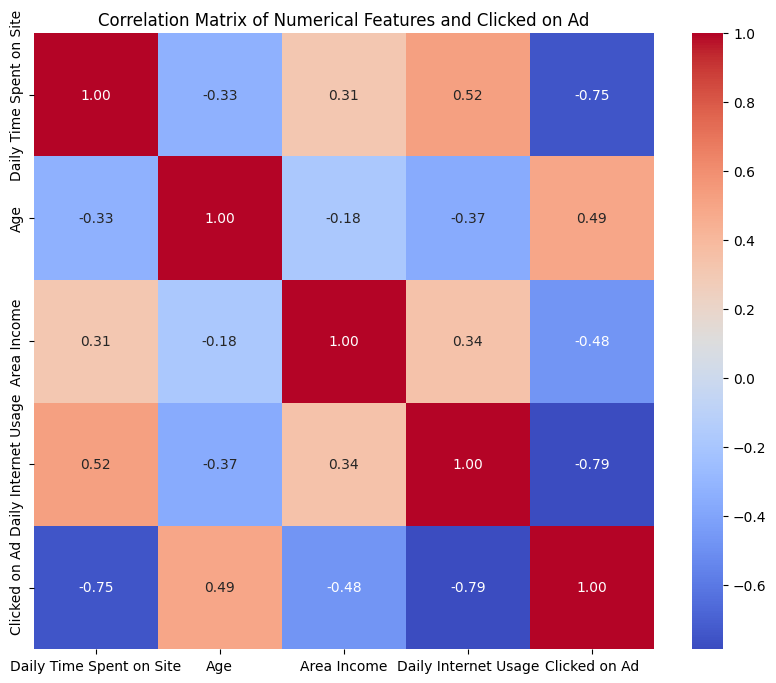

In [50]:
## c
numerical_features_for_corr = ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Clicked on Ad']

df_corr = dfavd[numerical_features_for_corr]
correlation_matrix = df_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Clicked on Ad')
plt.show()

In [65]:
## d
X = dfavd.drop(['Clicked on Ad', 'Ad Topic Line', 'City', 'Country','Timestamp','Male'], axis=1)
y = dfavd['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
print("Logistic Regression Intercept:", log_reg_model.intercept_)
print("Logistic Regression Coefficients:", log_reg_model.coef_)

Shape of X_train: (800, 4)
Shape of X_test: (200, 4)
Shape of y_train: (800,)
Shape of y_test: (200,)
Logistic Regression Intercept: [1.44769594]
Logistic Regression Coefficients: [[-2.49167319  1.25402038 -1.58225053 -2.72212417]]


In [72]:
##e
from sklearn.model_selection import cross_val_score
cv = 5

accuracy_scores = cross_val_score(log_reg_model, X, y, cv=cv, scoring='accuracy')
print(f"Accuracy scores for each fold: {accuracy_scores}")
print(f"Mean accuracy across {cv} folds: {accuracy_scores.mean():.4f}")
print(f"Standard deviation of accuracy across {cv} folds: {accuracy_scores.std():.4f}")

precision_scores = cross_val_score(log_reg_model, X, y, cv=cv, scoring='precision')
print(f"\nPrecision scores for each fold: {precision_scores}")
print(f"Mean precision across {cv} folds: {precision_scores.mean():.4f}")
print(f"Standard deviation of precision across {cv} folds: {precision_scores.std():.4f}")

recall_scores = cross_val_score(log_reg_model, X, y, cv=cv, scoring='recall')
print(f"\nRecall scores for each fold: {recall_scores}")
print(f"Mean recall across {cv} folds: {recall_scores.mean():.4f}")
print(f"Standard deviation of recall across {cv} folds: {recall_scores.std():.4f}")

f1_scores = cross_val_score(log_reg_model, X, y, cv=cv, scoring='f1')
print(f"\nF1-score scores for each fold: {f1_scores}")
print(f"Mean F1-score across {cv} folds: {f1_scores.mean():.4f}")
print(f"Standard deviation of F1-score across {cv} folds: {f1_scores.std():.4f}")

Accuracy scores for each fold: [0.985 0.96  0.99  0.95  0.96 ]
Mean accuracy across 5 folds: 0.9690
Standard deviation of accuracy across 5 folds: 0.0156

Precision scores for each fold: [1.         0.9893617  0.98039216 0.95       0.97916667]
Mean precision across 5 folds: 0.9798
Standard deviation of precision across 5 folds: 0.0167

Recall scores for each fold: [0.97 0.93 1.   0.95 0.94]
Mean recall across 5 folds: 0.9580
Standard deviation of recall across 5 folds: 0.0248

F1-score scores for each fold: [0.98477157 0.95876289 0.99009901 0.95       0.95918367]
Mean F1-score across 5 folds: 0.9686
Standard deviation of F1-score across 5 folds: 0.0158


In [73]:
##f
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

y_pred_log_reg = log_reg_model.predict(X_test)

print("LOGISTIC REGRESSION EVALUATION")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

LOGISTIC REGRESSION EVALUATION
Accuracy: 0.95
Confusion Matrix:
 [[ 86   3]
 [  7 104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95        89
           1       0.97      0.94      0.95       111

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



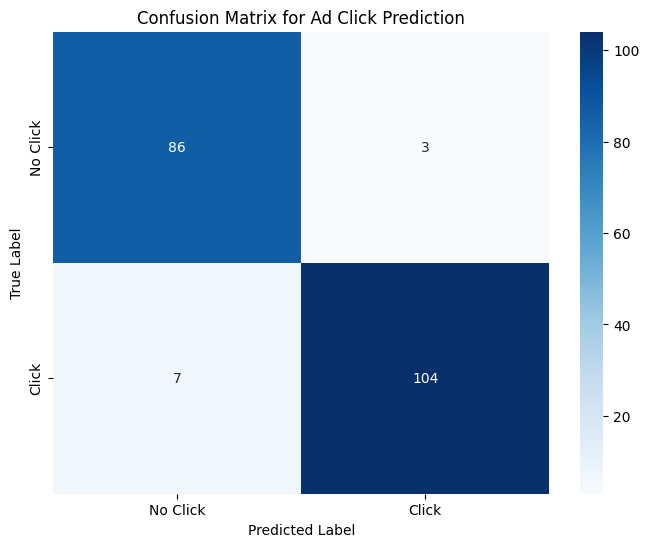

In [75]:
##g
from sklearn.metrics import confusion_matrix

y_pred_log_reg = log_reg_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Click', 'Click'], yticklabels=['No Click', 'Click'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Ad Click Prediction')
plt.show()

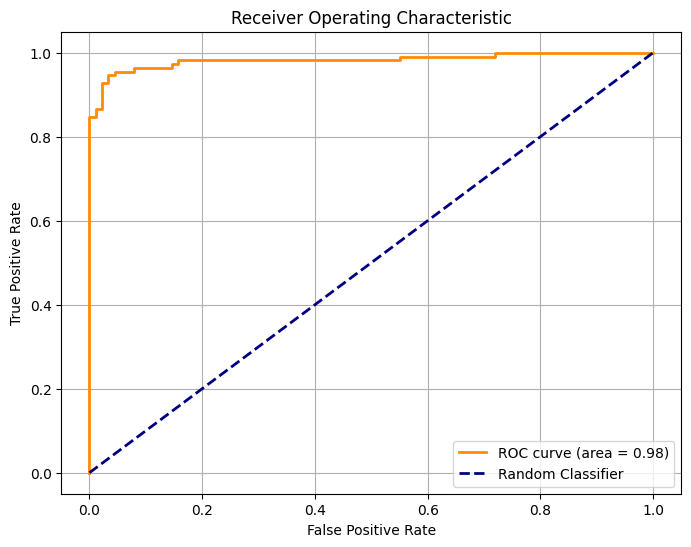

In [56]:
## g
from sklearn.metrics import roc_curve, auc
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


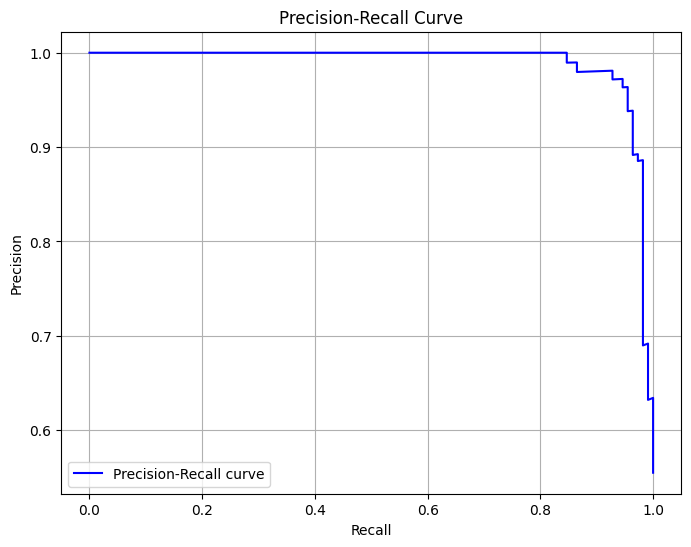

In [57]:
##g
from sklearn.metrics import precision_recall_curve
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend(loc='lower left')
plt.show()

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

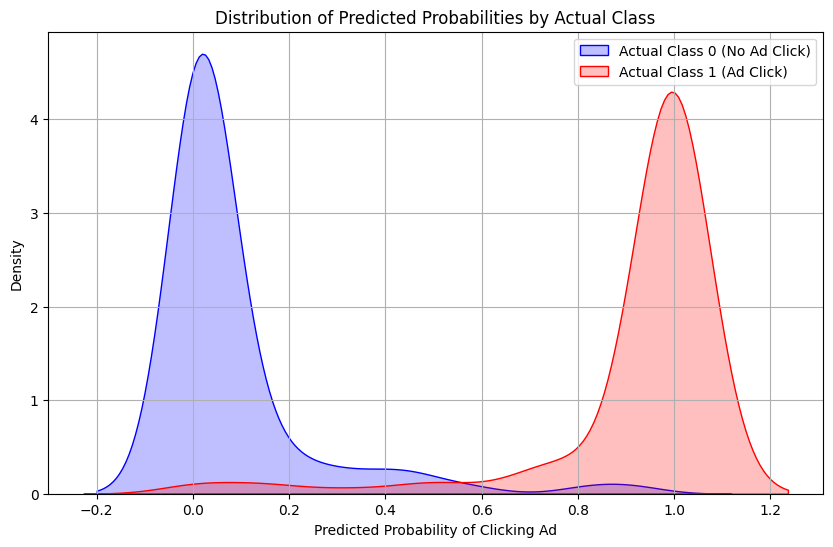

In [78]:
## h
y_pred_proba_class0 = y_pred_proba[y_test == 0]
y_pred_proba_class1 = y_pred_proba[y_test == 1]
plt.figure(figsize=(10, 6))
sns.kdeplot(y_pred_proba_class0, label='Actual Class 0 (No Ad Click)', color='blue', fill=True)
sns.kdeplot(y_pred_proba_class1, label='Actual Class 1 (Ad Click)', color='red', fill=True)
plt.title('Distribution of Predicted Probabilities by Actual Class')
plt.xlabel('Predicted Probability of Clicking Ad')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()